<a href="https://colab.research.google.com/github/Allekarthik/AIML_Projects_and_labs/blob/main/AIML_4%20_exercise_Module_01_LAB_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


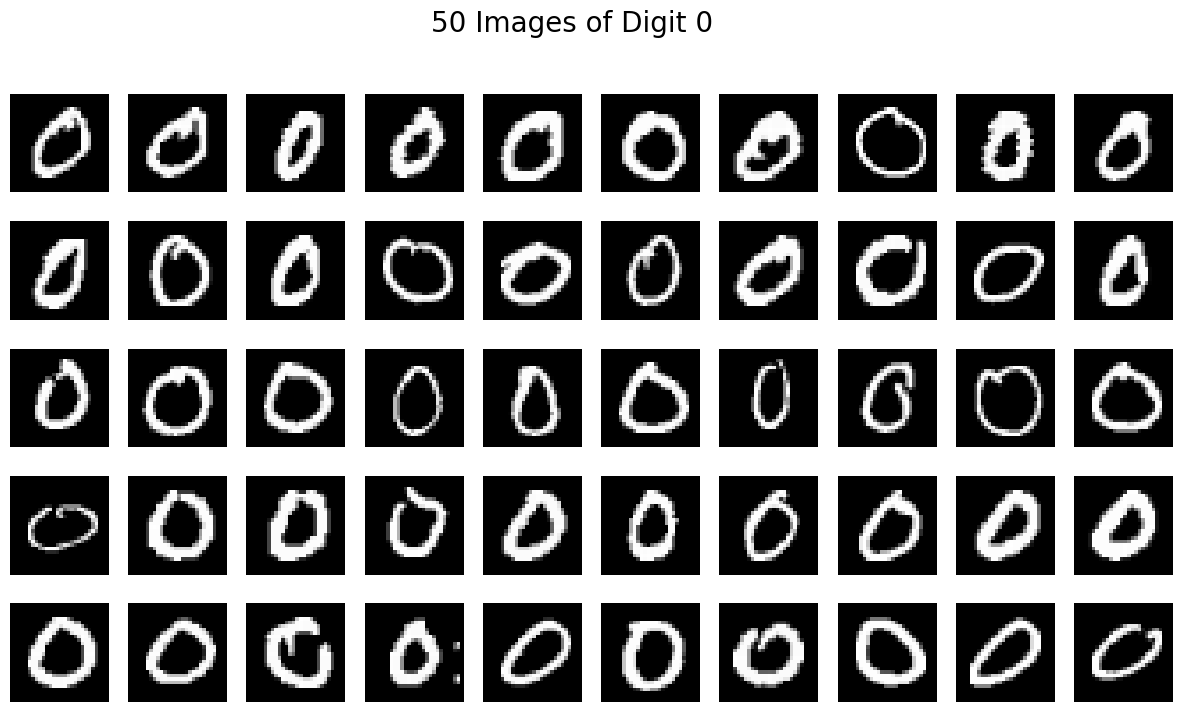

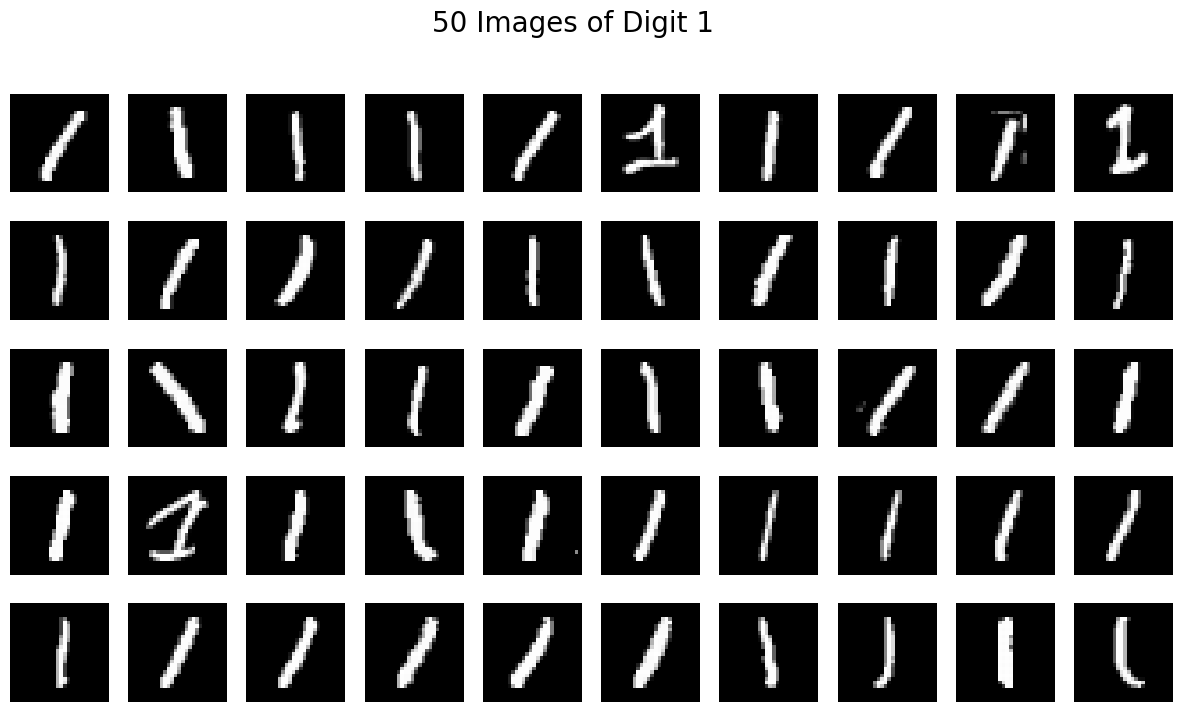

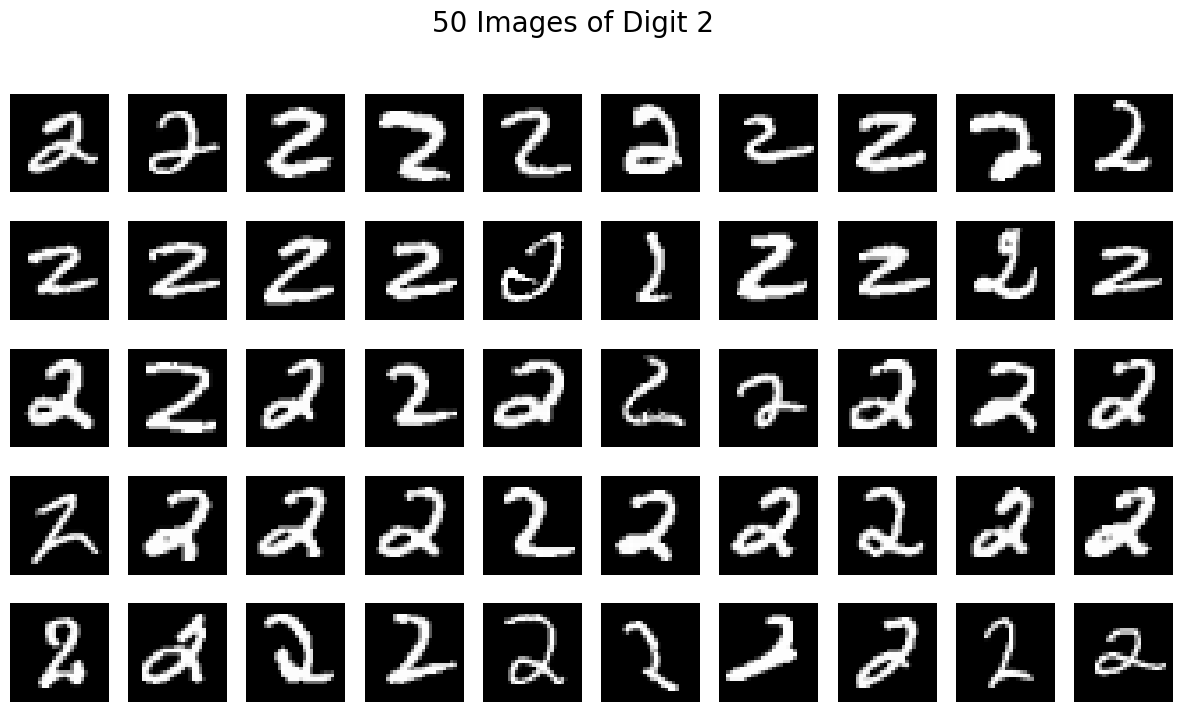

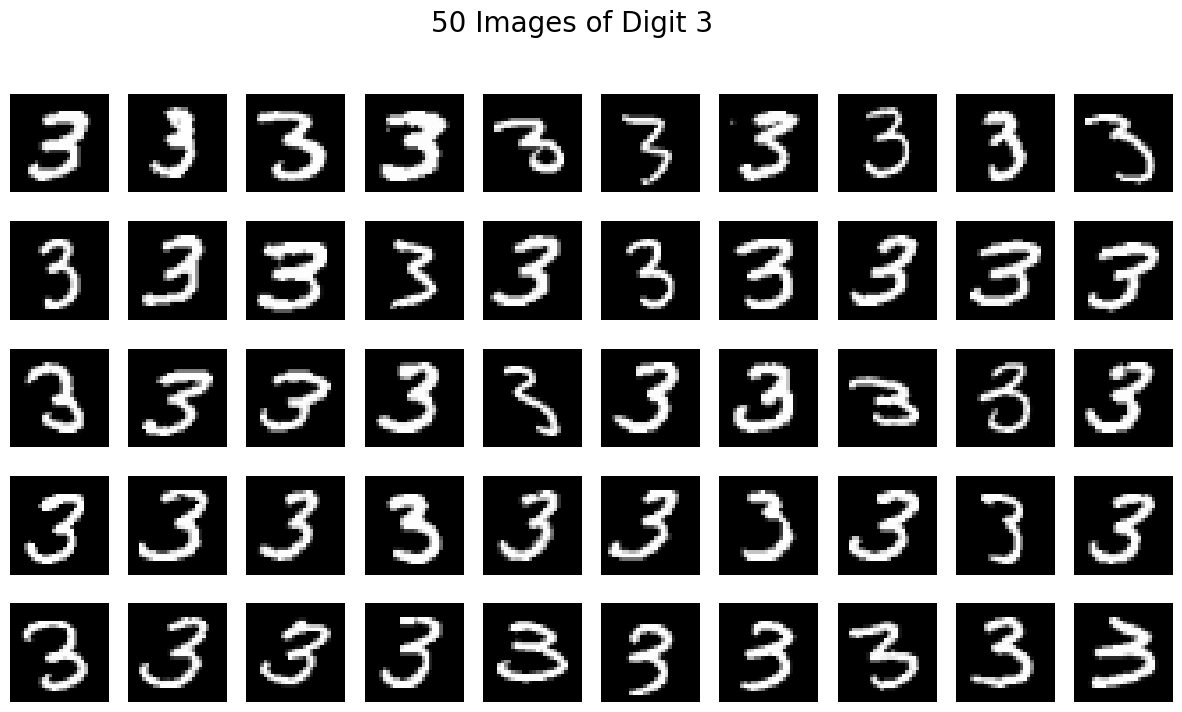

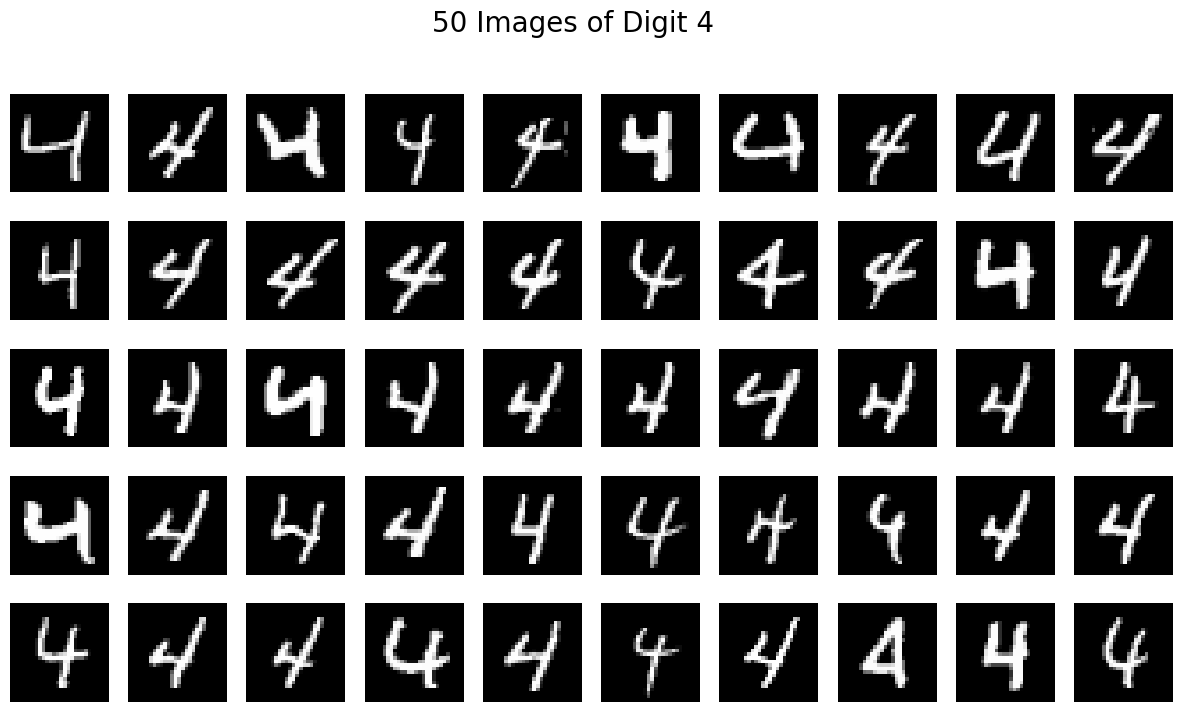

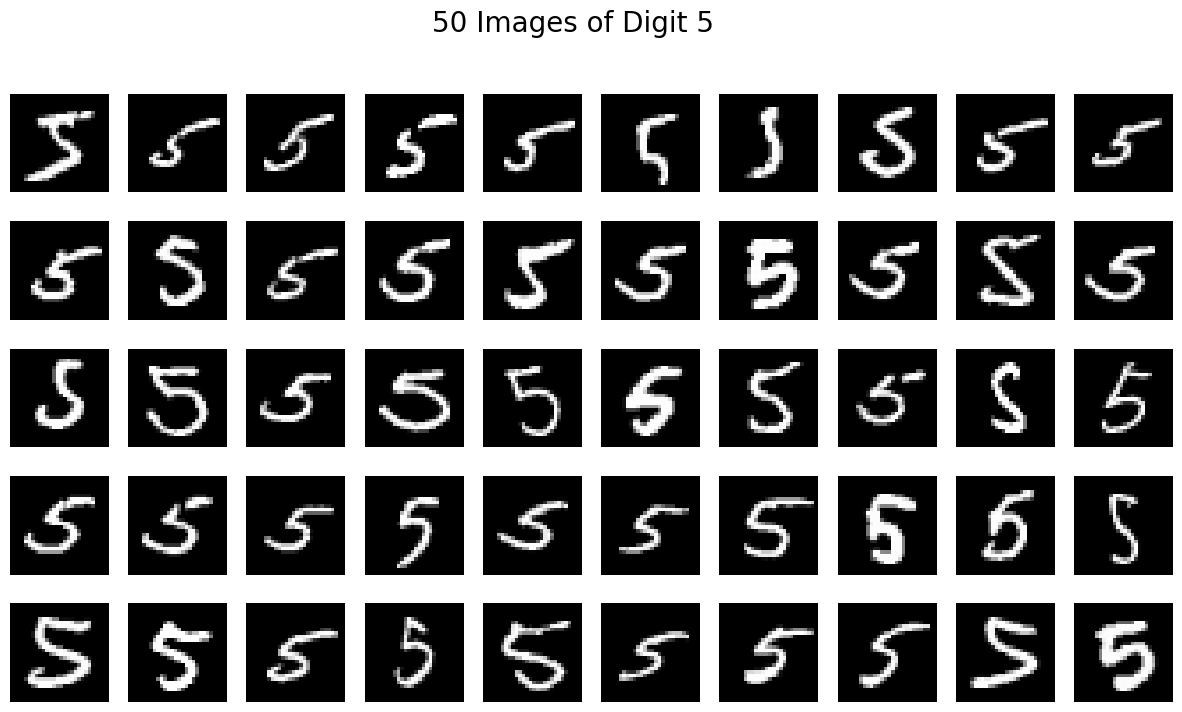

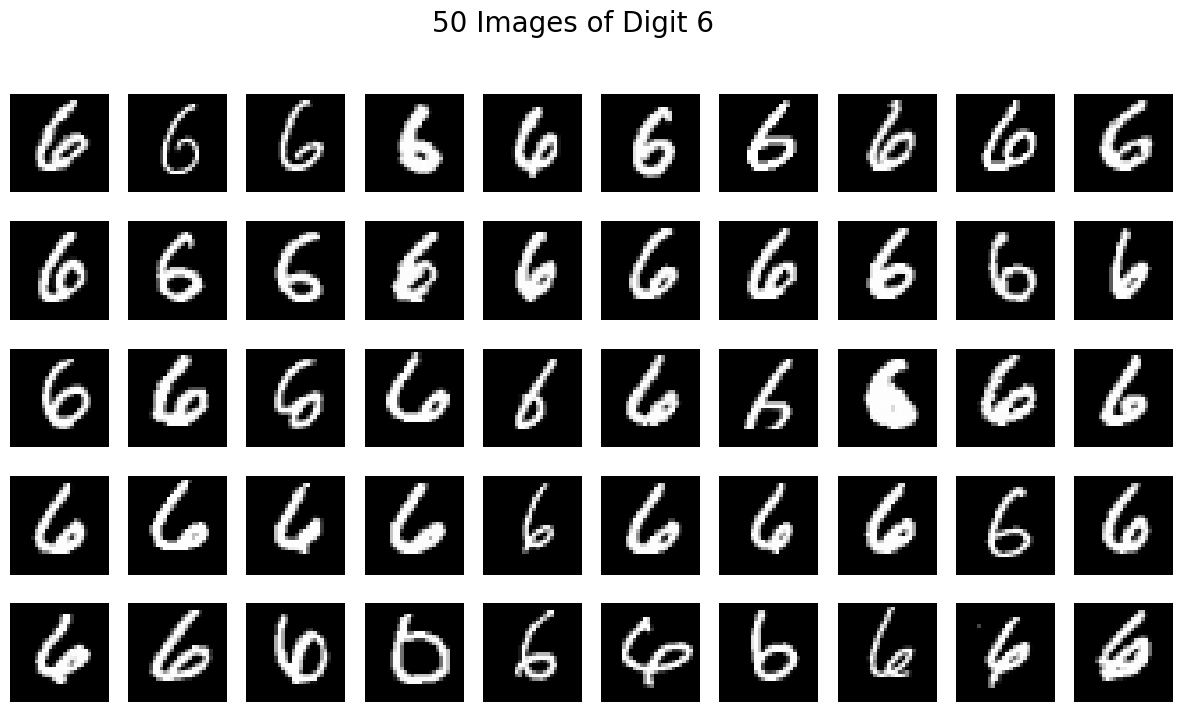

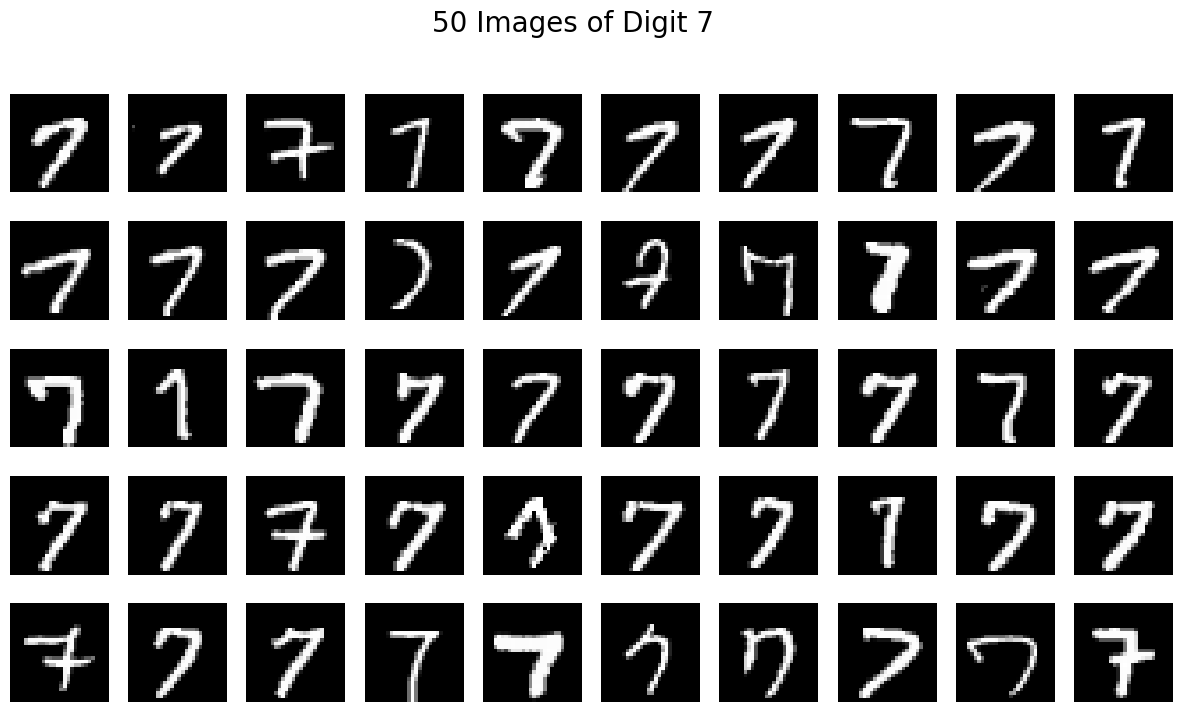

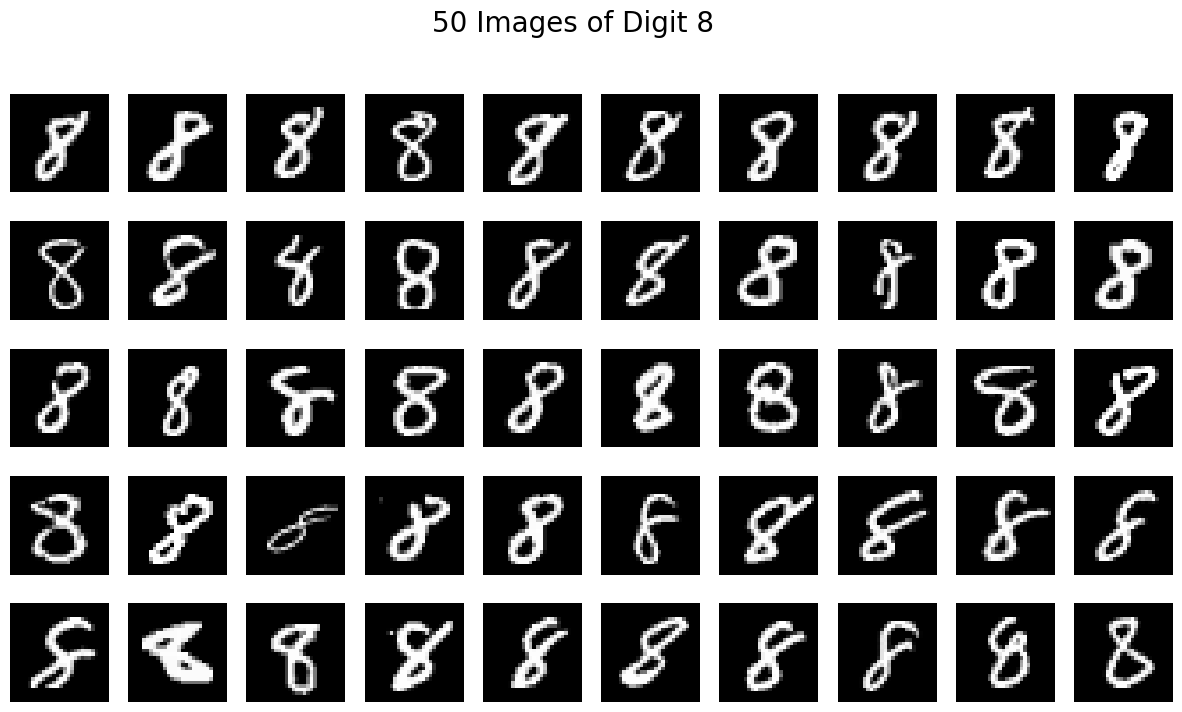

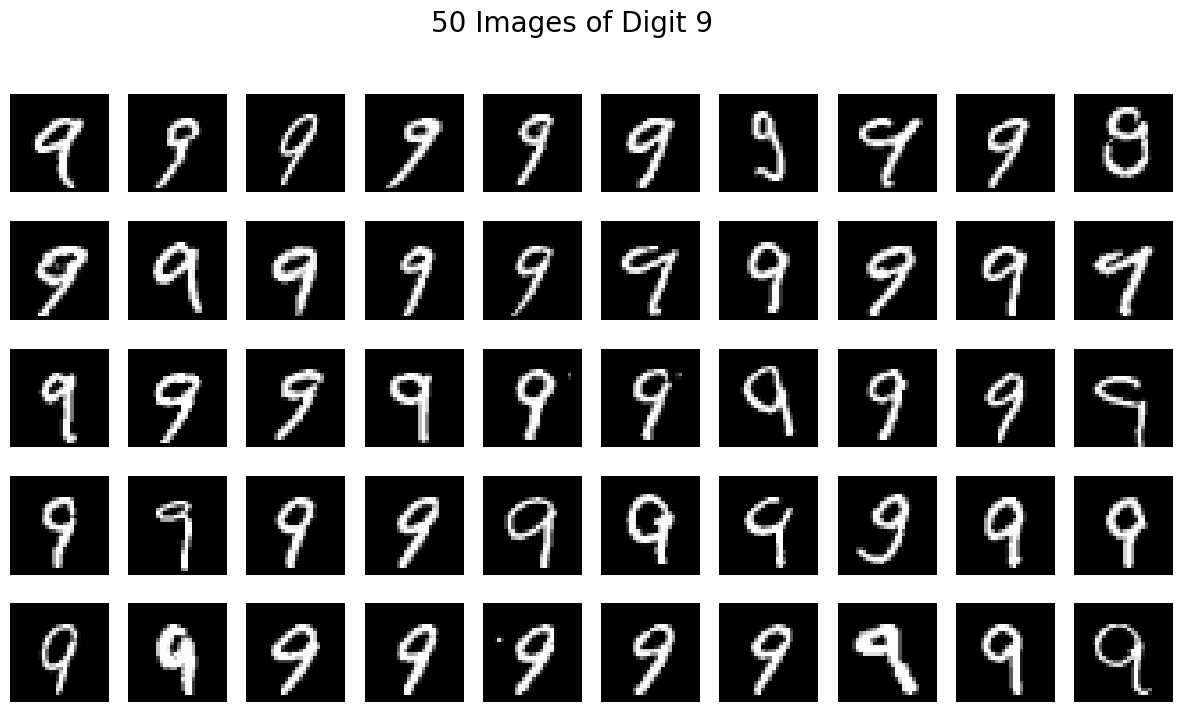

In [16]:
num_samples_per_digit = 50
selected_indices = []
for digit in range(10):
    indices = np.where(y_train == digit)[0][:num_samples_per_digit]
    selected_indices.extend(indices)

x_train_subset = x_train[selected_indices]
y_train_subset = y_train[selected_indices]

# Function to plot images
def plot_images(images, labels, digit):
    fig, axes = plt.subplots(5, 10, figsize=(15, 8))
    fig.suptitle(f'50 Images of Digit {digit}', fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
    plt.show()

# Plot 50 images for each digit
for digit in range(10):
    digit_images = x_train_subset[y_train_subset == digit]
    plot_images(digit_images, y_train_subset, digit)

In [4]:
x_train_subset = x_train_subset.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
x_train_subset = np.expand_dims(x_train_subset, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
y_train_subset = to_categorical(y_train_subset, 10)
y_test = to_categorical(y_test, 10)


In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
model.fit(x_train_subset, y_train_subset, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
15/15 [==============================] - 2s 44ms/step - loss: 1.9462 - accuracy: 0.4378 - val_loss: 5.2601 - val_accuracy: 0.0000e+00
Epoch 2/10
15/15 [==============================] - 0s 28ms/step - loss: 0.8935 - accuracy: 0.7756 - val_loss: 9.3977 - val_accuracy: 0.0000e+00
Epoch 3/10
15/15 [==============================] - 0s 29ms/step - loss: 0.4410 - accuracy: 0.8711 - val_loss: 11.6883 - val_accuracy: 0.0000e+00
Epoch 4/10
15/15 [==============================] - 0s 29ms/step - loss: 0.3328 - accuracy: 0.8933 - val_loss: 10.8296 - val_accuracy: 0.0000e+00
Epoch 5/10
15/15 [==============================] - 0s 30ms/step - loss: 0.2276 - accuracy: 0.9267 - val_loss: 10.6637 - val_accuracy: 0.0000e+00
Epoch 6/10
15/15 [==============================] - 0s 27ms/step - loss: 0.2404 - accuracy: 0.9156 - val_loss: 10.7698 - val_accuracy: 0.0000e+00
Epoch 7/10
15/15 [==============================] - 0s 30ms/step - loss: 0.1430 - accuracy: 0.9600 - val_loss: 11.0468 - val_a

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_accuracy:.4f}')

Test accuracy: 0.8293
